In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting beautiful graphs

# train test split from sklearn
from sklearn.model_selection import train_test_split

# Import Torch 
import torch
import torch.nn as nn
from torchvision import transforms, models
# from torch.utils.data import SubsetRandomSampler
from torch.autograd import Variable
from torch import nn, optim
import torch.nn.functional as F
import torch
from torch.utils.data import Subset
import torchvision
from torchvision import datasets
from torchvision import transforms
import numpy as np
# example of ordinal encoding for a neural network
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Samsung Laptop/AI Cybersecurity Def/Project/MNIST_dataset/train.csv', dtype=np.float32)
test = pd.read_csv('/content/drive/MyDrive/Samsung Laptop/AI Cybersecurity Def/Project/MNIST_dataset/test.csv', dtype=np.float32)

In [ ]:
#https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
PATH_2_DATA = "/content/drive/MyDrive/Samsung Laptop/AI Cybersecurity Def/Project/Stroke_dataset/healthcare-dataset-stroke-data.csv"
data = pd.read_csv("/content/drive/MyDrive/Samsung Laptop/AI Cybersecurity Def/Project/Stroke_dataset/healthcare-dataset-stroke-data.csv")
data = data.dropna()
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df = data.iloc[:,:-1]
column_names_for_onehot = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
X = pd.get_dummies(df, columns=column_names_for_onehot, drop_first=True)
X

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,0,0,1,0,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,13.0,0,0,103.08,18.6,0,0,0,0,0,0,1,0,0,0,0
5106,44873,81.0,0,0,125.20,40.0,0,0,1,0,0,1,0,1,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,0,1,0,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,1,0,1,0,1,0,0,0,1,0,0


In [ ]:
from sklearn import preprocessing
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(X)
X = pd.DataFrame(scaled_df, columns=X.columns)
X = X.dropna()
X

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-1.298312,1.051434,-0.328602,4.185032,2.706375,0.981345,1.189990,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,0.984080,2.184951,-0.766774,-0.427313
2,-0.255478,1.626390,-0.328602,4.185032,-0.005028,0.459269,1.189990,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,-1.016178,-0.457676,1.304165,-0.427313
3,1.118363,0.255342,-0.328602,-0.238947,1.437358,0.701207,-0.840343,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,0.984080,-0.457676,-0.766774,2.340204
4,-1.647136,1.582163,3.043196,-0.238947,1.501184,-0.623083,-0.840343,-0.01399,0.723884,-0.065756,-1.157010,2.288955,-0.394112,-1.016178,-0.457676,1.304165,-0.427313
5,0.952339,1.670617,-0.328602,-0.238947,1.768195,0.013595,1.189990,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,0.984080,2.184951,-0.766774,-0.427313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,-1.055680,-1.336844,-0.328602,-0.238947,-0.067750,-1.310695,-0.840343,-0.01399,-1.381436,-0.065756,-1.157010,-0.436881,2.537348,-1.016178,-0.457676,-0.766774,-0.427313
5106,0.394863,1.670617,-0.328602,-0.238947,0.420775,1.414286,-0.840343,-0.01399,0.723884,-0.065756,-1.157010,2.288955,-0.394112,0.984080,-0.457676,1.304165,-0.427313
5107,-0.793720,-0.363842,-0.328602,-0.238947,-0.511443,0.217332,-0.840343,-0.01399,0.723884,-0.065756,-1.157010,2.288955,-0.394112,-1.016178,-0.457676,1.304165,-0.427313
5108,0.048497,0.343796,-0.328602,-0.238947,1.328257,-0.419346,1.189990,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,-1.016178,2.184951,-0.766774,-0.427313


In [ ]:
y = data.iloc[:,-1].values
#y = y.reshape((len(y), 1))
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
data_out = pd.concat([df_2, data.iloc[:,-1]], axis=1)
data_out

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,1,0,0,1
1,51676,61.0,0,0,202.21,NaN,0,0,1,0,0,1,0,0,0,1,0,1
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0,0,1,0,1
3,60182,49.0,0,0,171.23,34.4,0,0,1,0,1,0,0,1,0,0,1,1
4,1665,79.0,1,0,174.12,24.0,0,0,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0,0,1,0,1,0,0,1,0,1,0,0
5106,44873,81.0,0,0,125.20,40.0,0,0,1,0,0,1,0,1,0,1,0,0
5107,19723,35.0,0,0,82.99,30.6,0,0,1,0,0,1,0,0,0,1,0,0
5108,37544,51.0,0,0,166.29,25.6,1,0,1,0,1,0,0,0,1,0,0,0


In [ ]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split

# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, 1:-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	# reshape target to be a 2d array
	y = y.reshape((len(y), 1))
	return X, y

# load the dataset
X, y = load_dataset(PATH_2_DATA)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, shuffle=True)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (3424, 10) (3424, 1)
Test (1687, 10) (1687, 1)


In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.33, random_state=1, shuffle=True)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (3423, 17) (3423, 1)
Test (1687, 17) (1687, 1)


In [ ]:
# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(X.values, y, test_size=0.2, random_state=1, shuffle=True)

In [ ]:
train.label.head()


0    1.0
1    0.0
2    1.0
3    4.0
4    0.0
Name: label, dtype: float32

In [ ]:
# Seperate the features and labels
targets_np = train.label.values
features_np = train.loc[:, train.columns != 'label'].values/255

# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(features_np, targets_np, test_size=0.2, random_state=42)

In [ ]:
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


In [ ]:
# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(target_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(target_test).type(torch.LongTensor) # data type is long

In [ ]:
print(featuresTrain.shape, targetsTrain.shape, featuresTest.shape, targetsTest.shape)

torch.Size([33600, 784]) torch.Size([33600]) torch.Size([8400, 784]) torch.Size([8400])


In [ ]:
# Set batch size
batch_size = 64

# Pytorch train and test sets
train_data = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test_data = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True)

In [ ]:
num_teachers = 10 # we're working with 100 teachers
num_examples = len(train_data) // num_teachers # the size of each teacher's dataset
num_workers = 0 # number of subprocesses for data loading
batch_size = 64 # number of samples per batch

# Split the data among all teachers
teacher_loaders = []

for i in range(num_teachers):
    indices = list(range(i * num_examples, (i+1) * num_examples))
    data = Subset(train_data, indices)
    loader = torch.utils.data.DataLoader(data, batch_size=batch_size, num_workers=num_workers)
    teacher_loaders.append(loader)

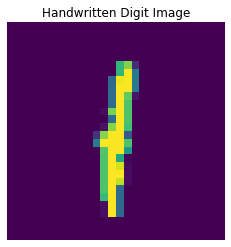

In [ ]:
# visualize one of the images in data set
def visualize_image(data, index, pred=False, val=0):
    '''This funtion can be used to visualize the images'''
    plt.imshow(data[index].reshape(28,28))
    plt.axis("off")
    plt.title("Handwritten Digit Image")
    plt.show()
visualize_image(features_np, 12)

In [ ]:
featuresTrain.shape

torch.Size([4088, 17])

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        # 5 Hidden Layer Network
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)
        
        # Dropout module with 0.2 probbability
        self.dropout = nn.Dropout(p=0.2)
        # Add softmax on output layer
        self.log_softmax = F.log_softmax
        
    def forward(self, x):
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.dropout(F.relu(self.fc4(x)))
        
        x = self.log_softmax(self.fc5(x), dim=1)
        
        return x

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        # 5 Hidden Layer Network
        self.fc1 = nn.Linear(17, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 2)
        
        # Dropout module with 0.2 probbability
        self.dropout = nn.Dropout(p=0.2)
        # Add softmax on output layer
        self.log_softmax = F.log_softmax
        
    def forward(self, x):
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.dropout(F.relu(self.fc4(x)))
        
        x = self.log_softmax(self.fc5(x))
        
        return x

In [ ]:
model = Classifier()#.double()
# Define our loss function
criterion = nn.NLLLoss()
# Define the optimier
optimizer = optim.Adam(model.parameters(), lr=0.0015)

epochs = 5
steps = 0
print_every = 5
train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        steps += 1
        # Prevent accumulation of gradients
        optimizer.zero_grad()
        # Make predictions
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        #backprop
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0

            # Turn off gradients for validation
            with torch.no_grad():
                model.eval()
                for images, labels in test_loader:
                    log_ps = model(images)
                    test_loss += criterion(log_ps, labels)

                    ps = torch.exp(log_ps)
                    # Get our top predictions
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor))

            model.train()

            train_losses.append(running_loss/len(train_loader))
            test_losses.append(test_loss/len(test_loader))

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(train_losses[-1]),
                  "Test Loss: {:.3f}.. ".format(test_losses[-1]),
                  "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

In [ ]:
def train(model, trainloader, criterion, optimizer, epochs=10):
  train_losses, test_losses = [], []
  for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        
        # Prevent accumulation of gradients
        optimizer.zero_grad()
        # Make predictions
        log_ps = model(images)
        
        loss = criterion(log_ps, labels)
        #backprop
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    print("Epoc: ", e+1,  "Loss: ", running_loss)
      

In [ ]:
def train(model, trainloader, criterion, optimizer, epochs=10):
  train_losses, test_losses = [], []
  for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        
        # Prevent accumulation of gradients
        optimizer.zero_grad()
        
        # Make predictions
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        #backprop
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    print("Epoc: ", e+1,  "Loss: ", running_loss)

**MNIST**

In [ ]:
teacher_models = []
num_teachers = 10
for i in range(num_teachers):
    print("Training Teacher #", i+1)
    model = Classifier()
    criterion = nn.NLLLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train(model, train_loader, criterion, optimizer)
    teacher_models.append(model)

Training Teacher # 1
Epoc:  1 Loss:  257.078210901469
Epoc:  2 Loss:  94.46797699481249
Epoc:  3 Loss:  68.48429171741009
Epoc:  4 Loss:  56.588981638196856
Epoc:  5 Loss:  43.93288158951327
Epoc:  6 Loss:  40.60950640810188
Epoc:  7 Loss:  32.43119333893992
Epoc:  8 Loss:  30.201596719911322
Epoc:  9 Loss:  27.732783639919944
Epoc:  10 Loss:  21.782293470576406
Training Teacher # 2
Epoc:  1 Loss:  250.89323365315795
Epoc:  2 Loss:  90.90833532810211
Epoc:  3 Loss:  67.03861889708787
Epoc:  4 Loss:  51.38085844414309
Epoc:  5 Loss:  45.09451748826541
Epoc:  6 Loss:  38.44927969807759
Epoc:  7 Loss:  32.75459095090628
Epoc:  8 Loss:  28.616444741142914
Epoc:  9 Loss:  26.923179618897848
Epoc:  10 Loss:  25.008857161796186
Training Teacher # 3
Epoc:  1 Loss:  256.8853597790003
Epoc:  2 Loss:  92.26163549907506
Epoc:  3 Loss:  68.42948478460312
Epoc:  4 Loss:  53.268639070447534
Epoc:  5 Loss:  45.48750689555891
Epoc:  6 Loss:  40.25153160607442
Epoc:  7 Loss:  32.946156069636345
Epoc:  8

**Medical**

In [ ]:
num_teachers = 10
teacher_models = []
for i in range(num_teachers):
    print("Training Teacher #", i+1)
    model = Classifier().double()
    criterion = nn.NLLLoss()
    #criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train(model,  teacher_loaders[i], criterion, optimizer)
    teacher_models.append(model)

Training Teacher # 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoc:  1 Loss:  1490.4409599694832
Epoc:  2 Loss:  166.3463599720209
Epoc:  3 Loss:  45.389025063097264
Epoc:  4 Loss:  30.46285791977291
Epoc:  5 Loss:  24.779855210268476
Epoc:  6 Loss:  22.10638364611048
Epoc:  7 Loss:  21.90820649206878
Epoc:  8 Loss:  18.039951453998665
Epoc:  9 Loss:  16.853178046953893
Epoc:  10 Loss:  16.705453956129332
Training Teacher # 2
Epoc:  1 Loss:  1158.3635490921533
Epoc:  2 Loss:  113.86759564449139
Epoc:  3 Loss:  43.644518071118156
Epoc:  4 Loss:  25.384072162610465
Epoc:  5 Loss:  26.190761036274814
Epoc:  6 Loss:  20.187878430796772
Epoc:  7 Loss:  18.446984600670636
Epoc:  8 Loss:  21.23191183364489
Epoc:  9 Loss:  16.887795552605574
Epoc:  10 Loss:  16.14658159696143
Training Teacher # 3
Epoc:  1 Loss:  734.6863362881437
Epoc:  2 Loss:  92.01154995821322
Epoc:  3 Loss:  30.1133383292286
Epoc:  4 Loss:  25.141600766117136
Epoc:  5 Loss:  23.388668865254914
Epoc:  6 Loss:  19.48378447112353
Epoc:  7 Loss:  17.985220113454776
Epoc:  8 Loss:  18.880

In [ ]:
batch_size = 64
student_train_size = int(len(test_data) * 0.05) # 5% of data for training - 500 samples
student_test_size = int(len(test_data) * 0.05)  # 5% of data for testing - 500 samples

student_train_data = Subset(test_data, list(range(student_train_size)))
student_test_data = Subset(test_data, list(range(student_train_size, student_train_size + student_test_size)))

student_train_loader = torch.utils.data.DataLoader(student_train_data, batch_size=batch_size, num_workers=num_workers)
student_test_loader = torch.utils.data.DataLoader(student_test_data, batch_size=batch_size, num_workers=num_workers)

In [ ]:
batch_size = 64
student_train_size = int(len(test_data)*0.5) # 5% of data for training - 500 samples
student_test_size = int(len(test_data)*0.5)  # 5% of data for testing - 500 samples

student_train_data = Subset(test_data, list(range(student_train_size)))
student_test_data = Subset(test_data, list(range(student_train_size, student_train_size + student_test_size)))

student_train_loader = torch.utils.data.DataLoader(student_train_data, batch_size=batch_size, num_workers=num_workers)
student_test_loader = torch.utils.data.DataLoader(student_test_data, batch_size=batch_size, num_workers=num_workers)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def predict(model, dataloader):
    outputs = torch.zeros(0, dtype=torch.long).to(device)
    model.to(device)
    model.eval()
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        output = model.forward(images)
        ps = torch.argmax(torch.exp(output), dim=1)
        outputs = torch.cat((outputs, ps))
    
    return outputs

**Medical**

In [ ]:
epsilon = 0.1 (10)
#Data Independent Epsilon: 168.63292546497027
#Data Dependent Epsilon: 168.6329254649676

Epsilon:  0.1 (20)
#Data Independent Epsilon: 31.15292546497023
#Data Dependent Epsilon: 31.15292546496999



epsilon = 0.2
#Data Independent Epsilon: 90.07292546497024
#Data Dependent Epsilon: 90.07292546496926

epsilon = 0.15
#Data Independent Epsilon: 55.70292546497023
#Data Dependent Epsilon: 55.70292546497065

epsilon = 0.15
#Data Independent Epsilon: 55.70292546497023
#Data Dependent Epsilon: 55.70292546497065

Data Independent Epsilon: 2.231492546497023
Data Dependent Epsilon: 2.2314925464970288
Epsilon:  0.02
Data Independent Epsilon: 4.659385092994046
Data Dependent Epsilon: 4.65938509299402
Epsilon:  0.03
Data Independent Epsilon: 7.297231366242556
Data Dependent Epsilon: 7.29723136624254
Epsilon:  0.04
Data Independent Epsilon: 10.122441821656743
Data Dependent Epsilon: 10.122441821656691

Epsilon:  0.11
Data Independent Epsilon: 35.277325464970225
Data Dependent Epsilon: 35.27732546497052
Epsilon:  0.12
Data Independent Epsilon: 39.79452546497023
Data Dependent Epsilon: 39.794525464970484
Epsilon:  0.13
Data Independent Epsilon: 44.70452546497023
Data Dependent Epsilon: 44.70452546496997
Epsilon:  0.13999999999999999
Data Independent Epsilon: 50.00732546497022
Data Dependent Epsilon: 50.007325464970116
Epsilon:  0.14999999999999997
Data Independent Epsilon: 55.70292546497021
Data Dependent Epsilon: 55.70292546497065
Epsilon:  0.15999999999999998
Data Independent Epsilon: 61.791325464970214
Data Dependent Epsilon: 61.79132546497062
Epsilon:  0.16999999999999998
Data Independent Epsilon: 68.27252546497022
Data Dependent Epsilon: 68.27252546497047
Epsilon:  0.17999999999999997
Data Independent Epsilon: 75.1465254649702
Data Dependent Epsilon: 75.14652546496933

In [ ]:
from numpy import arange
ep = arange(0.01, 0.09, 0.01)
ep

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08])

In [ ]:
saved_teacher_models = teacher_models

In [ ]:
print(len(teacher_models))
teacher_models += teacher_models
teacher_models += teacher_models
teacher_models += teacher_models
print(len(teacher_models))

10
80


In [ ]:
def PATE(epsilon=0.1):
  preds = torch.torch.zeros((len(teacher_models[:20]), student_train_size), dtype=torch.long)

  for i, model in enumerate(teacher_models[:20]):
      results = predict(model, student_train_loader)
      preds[i] = results

  labels = np.array([]).astype(int)
  for image_preds in np.transpose(preds):
      label_counts = np.bincount(image_preds, minlength=10)
      beta = 1 / epsilon

      for i in range(len(label_counts)):
          label_counts[i] += np.random.laplace(0, beta, 1)

      new_label = np.argmax(label_counts)
      labels = np.append(labels, new_label)

  PATE_labels = labels # Aggregate Teacher Labels   
  #true_labels = test_data.targets[:student_train_size] # True Labels
  PATE_preds = preds # Labels Obtained by Teachers

  print("Epsilon: ", epsilon)

  data_dep_eps, data_ind_eps = pate.perform_analysis(teacher_preds=PATE_preds, 
                                                   indices=PATE_labels, 
                                                   noise_eps=epsilon, 
                                                   delta=1e-5, 
                                                   moments=10)
  
  print("Data Independent Epsilon:", data_ind_eps)
  print("Data Dependent Epsilon:", data_dep_eps)
  return data_ind_eps, data_dep_eps


In [ ]:
PATE(epsilon=0.11)

Epsilon:  0.11
Data Independent Epsilon: 31.840925464970226
Data Dependent Epsilon: 31.840925464970454


(31.840925464970226, 31.840925464970454)

In [ ]:
Epsilon:  0.11 (1)
Data Independent Epsilon: 31.840925464970226
Data Dependent Epsilon: 31.840925464970454
Epoch: 50/50..  Training Loss: 0.006..  Test Loss: 0.700..  Test Accuracy: 0.866

Epsilon:  0.11 (10)
Data Independent Epsilon: 31.840925464970226
Data Dependent Epsilon: 31.840925464970454
Epoch: 47/50..  Training Loss: 0.014..  Test Loss: 0.689..  Test Accuracy: 0.876

In [ ]:
data_ind_eps = []
data_dep_eps = []

for e in ep:
  data_ind_ep, data_dep_ep = PATE(epsilon=e)
  data_ind_eps.append(data_ind_ep)
  data_dep_eps.append(data_dep_ep)

In [ ]:
preds = torch.torch.zeros((len(teacher_models), student_train_size), dtype=torch.long)

for i, model in enumerate(teacher_models):
    results = predict(model, student_train_loader)
    preds[i] = results

labels = np.array([]).astype(int)
for image_preds in np.transpose(preds):
    label_counts = np.bincount(image_preds, minlength=10)
    beta = 1 / epsilon

    for i in range(len(label_counts)):
        label_counts[i] += np.random.laplace(0, beta, 1)

    new_label = np.argmax(label_counts)
    labels = np.append(labels, new_label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
PATE_labels = labels # Aggregate Teacher Labels   
#true_labels = test_data.targets[:student_train_size] # True Labels
PATE_preds = preds # Labels Obtained by Teachers

In [ ]:
data_dep_eps, data_ind_eps = pate.perform_analysis(teacher_preds=PATE_preds, 
                                                   indices=PATE_labels, 
                                                   noise_eps=epsilon, 
                                                   delta=1e-5, 
                                                   moments=10)
print("Data Independent Epsilon:", data_ind_eps)
print("Data Dependent Epsilon:", data_dep_eps)

Data Independent Epsilon: 55.70292546497023
Data Dependent Epsilon: 55.70292546497065


In [ ]:
student_train_data = Subset(test_data, list(range(student_train_size)))
student_train_loader = torch.utils.data.DataLoader(student_train_data, batch_size=batch_size, num_workers=num_workers)

In [ ]:
def train_student(model, train_loader, test_loader, criterion, optimizer, epochs=10):
    
    model.to(device)
    running_loss = 0
    steps = 0
    
    for e in range(epochs):
        
        model.train()
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            steps += 1
            
            # 1) erase previous gradients (if they exist)
            optimizer.zero_grad()

            # 2) make a prediction
            pred = model.forward(images)

            # 3) calculate how much we missed
            loss = criterion(pred, labels)

            # 4) figure out which weights caused us to miss
            loss.backward()

            # 5) change those weights
            optimizer.step()

            # 6) log our progress
            running_loss += loss.item()
            
            if steps % 25 == 0:
                test_loss = 0
                accuracy = 0
                model.eval()
                with torch.no_grad():
                    for images, labels in test_loader:
                        images, labels = images.to(device), labels.to(device)
                        log_ps = model(images)
                        test_loss += criterion(log_ps, labels).item()

                        # Accuracy
                        ps = torch.exp(log_ps)
                        top_p, top_class = ps.topk(1, dim=1)
                        equals = top_class == labels.view(*top_class.shape)
                        accuracy += torch.mean(equals.type(torch.FloatTensor))
                model.train()
                print("Epoch: {}/{}.. ".format(e+1, epochs),
                      "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                      "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
                      "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))
                running_loss = 0
             
            

student_model = Classifier()#.double()
criterion = nn.NLLLoss()
optimizer = optim.Adam(student_model.parameters(), lr=0.002)
epochs = 50
train_student(student_model, student_train_loader, student_test_loader, criterion, optimizer, epochs)

Epoch: 4/50..  Training Loss: 6.044..  Test Loss: 0.881..  Test Accuracy: 0.685
Epoch: 8/50..  Training Loss: 2.329..  Test Loss: 0.571..  Test Accuracy: 0.797
Epoch: 11/50..  Training Loss: 1.051..  Test Loss: 0.577..  Test Accuracy: 0.831
Epoch: 15/50..  Training Loss: 0.399..  Test Loss: 0.564..  Test Accuracy: 0.852
Epoch: 18/50..  Training Loss: 0.274..  Test Loss: 0.559..  Test Accuracy: 0.844
Epoch: 22/50..  Training Loss: 0.129..  Test Loss: 0.574..  Test Accuracy: 0.863
Epoch: 25/50..  Training Loss: 0.107..  Test Loss: 0.718..  Test Accuracy: 0.825
Epoch: 29/50..  Training Loss: 0.098..  Test Loss: 0.735..  Test Accuracy: 0.854
Epoch: 33/50..  Training Loss: 0.269..  Test Loss: 0.541..  Test Accuracy: 0.863
Epoch: 36/50..  Training Loss: 0.085..  Test Loss: 0.644..  Test Accuracy: 0.856
Epoch: 40/50..  Training Loss: 0.041..  Test Loss: 0.733..  Test Accuracy: 0.863
Epoch: 43/50..  Training Loss: 0.077..  Test Loss: 0.523..  Test Accuracy: 0.886
Epoch: 47/50..  Training Loss:

In [ ]:
test_loss = 0
accuracy = 0
student_model.eval()
with torch.no_grad():
    for images, labels in student_test_loader:
        images, labels = images.to(device), labels.to(device)
        log_ps = student_model(images)
        test_loss += criterion(log_ps, labels).item()

        # Accuracy
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
student_model.train()
print("Test Loss: {:.3f}.. ".format(test_loss/len(student_test_loader)),
      "Test Accuracy: {:.3f}".format(accuracy/len(student_test_loader)))
running_loss = 0

Test Loss: 0.938..  Test Accuracy: 0.837


In [ ]:
!pip install syft==0.2.9
from syft.frameworks.torch.dp import pate

     |████████████████████████████████| 440kB 9.0MB/s 
     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 450kB 34.8MB/s 
     |████████████████████████████████| 81kB 4.5MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 9.0MB 16.6MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 20.1MB 1.5MB/s 
     |████████████████████████████████| 204kB 42.0MB/s 
     |████████████████████████████████| 491kB 36.0MB/s 
     |████████████████████████████████| 133kB 41.5MB/s 
     |████████████████████████████████| 1.8MB 35.8MB/s 
     |████████████████████████████████| 2.0MB 38.7MB/s 
     |████████████████████████████████| 4.0MB 35.0MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |█